In [1]:
def route():
    import sys  
    sys.path.insert(0, './scripts')

route()
import cno_libraries
%run -i './scripts/cno_libraries.py'

Successfully executed from __main__.


## 1. Configuración Inicial

In [2]:
# Información Geográfica
latitude = 4.604535       #Latitud
longitude = -74.066038    #Longitud
tz = 'America/Bogota'     #Huso Horario
altitude = 2632           #Altitud
surface_type = 'urban'    #irradiance.SURFACE_ALBEDOS

# Base de Datos
file_name = 'tmy_sd'
prefix = 'sd'

# Configuración del Sistema
## Inversor
inverters_database = 'CECInverter' # ['CECInverter', 'SandiaInverter', 'ADRInverter']
inverter_name = 'ABB__TRIO_50_0_TL_OUTD_US_480__480V_' # System A
# inverter_name = 'ABB__TRIO_27_6_TL_OUTD_S_US_480__480V_' # System B

## Módulo
modules_database = 'CECMod' # ['CECMod', 'SandiaMod']
module_name = 'LG_Electronics_Inc__LG400N2W_A5'
module_type = 'open_rack_glass_glass' #['open_rack_glass_glass', 'close_mount_glass_glass', 'open_rack_glass_polymer', 'insulated_back_glass_polymer']
surface_azimuth=180
surface_tilt=10

## Tracker
with_tracker = False
tracker_axis = 0
axis_tilt = 0
axis_azimuth = 0 #Heading south
max_angle = 0
racking_model = 'open_rack'
module_height = None

## Arreglo
num_arrays = 1
modules_per_string = [16] #Modules Per String [16 - SysA, 18 - SysB]
strings_per_inverter = [8] #Strings Per Inverter [8 - SysA, 4 - SysB]
array_name = ['SysA']

# Modelado de Producción con PVlib
ac_model='sandia'
loss = 26.9
num_inverter = 1
resolution = 60
energy_units = 'Wh'

## 2. Base de Datos

In [3]:
route()
import cno_data

df = cno_data.load_csv(file_name=file_name, tz=tz)
df.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
2000-01-01 00:30:00-05:00,2000,1,1,0,30,0.0,0.0,0.0,0.0,0.0,0.0,13.0,160.13,0.094,0.2,2.312,182.2,95.06,9.0,740.0
2000-01-01 01:30:00-05:00,2000,1,1,1,30,0.0,0.0,0.0,0.0,0.0,0.0,12.0,151.39,0.094,0.1,2.265,154.0,93.07,9.0,740.0
2000-01-01 02:30:00-05:00,2000,1,1,2,30,0.0,0.0,0.0,0.0,0.0,0.0,12.0,139.27,0.094,0.2,2.231,47.6,97.27,9.0,740.0
2000-01-01 03:30:00-05:00,2000,1,1,3,30,0.0,0.0,0.0,0.0,0.0,0.0,12.0,126.02,0.094,0.3,2.197,26.9,95.36,9.0,740.0
2000-01-01 04:30:00-05:00,2000,1,1,4,30,0.0,0.0,0.0,0.0,0.0,0.0,12.0,112.37,0.094,0.2,2.155,16.1,93.67,9.0,740.0


## 3. Datos Meteorológicos

In [4]:
route()
import cno_meteorology

location, solpos, airmass, etr_nrel = cno_meteorology.get_meteo(latitude, 
                                                                longitude, 
                                                                tz, 
                                                                altitude, 
                                                                datetime=df.index)

solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2000-01-01 00:30:00-05:00,160.128596,160.128596,-70.128596,-70.128596,158.893404,-3.152909
2000-01-01 01:30:00-05:00,151.396797,151.396797,-61.396797,-61.396797,132.282295,-3.172747
2000-01-01 02:30:00-05:00,139.270912,139.270912,-49.270912,-49.270912,120.556648,-3.192577
2000-01-01 03:30:00-05:00,126.027754,126.027754,-36.027754,-36.027754,115.277253,-3.212399
2000-01-01 04:30:00-05:00,112.372445,112.372445,-22.372445,-22.372445,113.045370,-3.232213


## 4. Descomposición + Transposición

### 4.1. Descomposición: DISC

In [5]:
route()
import cno_decomposition_transposition

disc = cno_decomposition_transposition.decomposition(ghi=df.GHI, 
                                                     solpos=solpos, 
                                                     datetime=df.index)

disc.head()

,dni,kt,airmass,dhi
2000-01-01 00:30:00-05:00,0.0,0.0,NaN,0.0
2000-01-01 01:30:00-05:00,0.0,0.0,NaN,0.0
2000-01-01 02:30:00-05:00,0.0,0.0,NaN,0.0
2000-01-01 03:30:00-05:00,0.0,0.0,NaN,0.0
2000-01-01 04:30:00-05:00,0.0,0.0,NaN,0.0


### 4.2. Montaje y Seguidor

In [6]:
route()
import cno_mount_tracker

mount, tracker = cno_mount_tracker.get_mount_tracker(with_tracker=with_tracker, 
                                                     surface_tilt=surface_tilt, 
                                                     surface_azimuth=surface_azimuth, 
                                                     solpos=solpos, 
                                                     axis_tilt=axis_tilt, 
                                                     axis_azimuth=axis_azimuth, 
                                                     max_angle=max_angle, 
                                                     tracker_axis=tracker_axis, 
                                                     racking_model=racking_model, 
                                                     module_height=module_height)

print('MOUNT\n', mount, '\n')
print('TRACKER\n', tracker)

MOUNT
 FixedMount(surface_tilt=10, surface_azimuth=180, racking_model='open_rack', module_height=None) 

TRACKER
 None


### 4.3. Transposición: Perez-Ineichen 1990

In [7]:
poa = cno_decomposition_transposition.transposition(with_tracker=with_tracker, 
                                                    tracker=tracker,
                                                    surface_tilt=surface_tilt, 
                                                    surface_azimuth=surface_azimuth, 
                                                    solpos=solpos, 
                                                    disc=disc, 
                                                    ghi=df.GHI, 
                                                    etr_nrel=etr_nrel, 
                                                    airmass=airmass, 
                                                    surface_type=surface_type)

poa.head()

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2000-01-01 00:30:00-05:00,0.0,-0.0,0.0,0.0,0.0
2000-01-01 01:30:00-05:00,0.0,-0.0,0.0,0.0,0.0
2000-01-01 02:30:00-05:00,0.0,-0.0,0.0,0.0,0.0
2000-01-01 03:30:00-05:00,0.0,-0.0,0.0,0.0,0.0
2000-01-01 04:30:00-05:00,0.0,-0.0,0.0,0.0,0.0


## 5. Configuración del Sistema

### 5.1. Inversor y Módulo

In [8]:
route()
import cno_inverter_module

inverter = cno_inverter_module.get_inverter(inverters_database=inverters_database, 
                                            inverter_name=inverter_name, 
                                            inv=None)

print('INVERTER\n', inverter, '\n')

module = cno_inverter_module.get_module(modules_database=modules_database, 
                                        module_name=module_name, 
                                        mod=None)

print('MODULE\n', module)

INVERTER
 Vac                          480
Pso                      143.487
Paco                       50000
Pdco                     50881.8
Vdco                         720
C0                  -1.28775e-07
C1                      -2.4e-05
C2                      0.001013
C3                     -0.000319
Pnt                            1
Vdcmax                       800
Idcmax                   70.6691
Mppt_low                     520
Mppt_high                    800
CEC_Date              10/15/2018
CEC_Type     Utility Interactive
Name: ABB__TRIO_50_0_TL_OUTD_US_480__480V_, dtype: object 

MODULE
 Technology            Mono-c-Si
Bifacial                      0
STC                     400.316
PTC                       368.4
A_c                           2
Length                        2
Width                         1
N_s                          72
I_sc_ref                  10.47
V_oc_ref                   49.3
I_mp_ref                   9.86
V_mp_ref                   40.6
alpha_sc  

### 5.2. Arreglos Fotovoltaicos

In [9]:
route()
import cno_def_pvsystem

string_arrays = cno_def_pvsystem.get_arrays(num_arrays=num_arrays,
                                            array_name=array_name,
                                            mount=mount, 
                                            surface_type=surface_type, 
                                            module_type=module_type, 
                                            module=pvlib.irradiance.SURFACE_ALBEDOS[surface_type], 
                                            mps=modules_per_string, 
                                            spi=strings_per_inverter)

string_arrays

[Array:
   name: SysA
   mount: FixedMount(surface_tilt=10, surface_azimuth=180, racking_model='open_rack', module_height=None)
   module: None
   albedo: 0.18
   module_type: open_rack_glass_glass
   temperature_model_parameters: {'a': -3.47, 'b': -0.0594, 'deltaT': 3}
   strings: 8
   modules_per_string: 16]

### 5.3. Sistema Fotovoltaico

In [10]:
system = cno_def_pvsystem.get_pvsystem(with_tracker=with_tracker,
                                       tracker=tracker,
                                       string_arrays=string_arrays, 
                                       surface_tilt=surface_tilt, 
                                       surface_azimuth=surface_azimuth, 
                                       surface_type=surface_type, 
                                       module_type=module_type, 
                                       module=module, 
                                       inverter=inverter, 
                                       racking_model=racking_model)

system

PVSystem:
  name: None
  Array:
    name: SysA
    mount: FixedMount(surface_tilt=10, surface_azimuth=180, racking_model='open_rack', module_height=None)
    module: None
    albedo: 0.18
    module_type: open_rack_glass_glass
    temperature_model_parameters: {'a': -3.47, 'b': -0.0594, 'deltaT': 3}
    strings: 8
    modules_per_string: 16
  inverter: None

## 6. Modelado de Producción con PVlib

### 6.1. Temperatura de las Celdas

In [11]:
route()
import cno_cell_temperature

temp_cell = cno_cell_temperature.get_tcell_tnoct(poa=poa.poa_global, 
                                                 temp_air=df['Temperature'], 
                                                 tnoct=module['T_NOCT'])

temp_cell.head()

2000-01-01 00:30:00-05:00    9.0
2000-01-01 01:30:00-05:00    9.0
2000-01-01 02:30:00-05:00    9.0
2000-01-01 03:30:00-05:00    9.0
2000-01-01 04:30:00-05:00    9.0
dtype: float64

### 6.2. Producción DC, Potencia AC y Energía

In [12]:
route()
import cno_production

dc, ac, energy = cno_production.production_pipeline(poa=poa.poa_global, 
                                                    cell_temperature=temp_cell, 
                                                    module=module, 
                                                    inverter=inverter, 
                                                    system=system, 
                                                    num_arrays=num_arrays, 
                                                    ac_model=ac_model, 
                                                    loss=loss, 
                                                    resolution=resolution, 
                                                    num_inverter=num_inverter, 
                                                    energy_units=energy_units)

In [13]:
dc

[                                   i_sc  v_oc          i_mp  v_mp  p_mp  \
 2000-01-01 00:30:00-05:00  1.615587e-27   0.0  1.180994e-27   0.0   0.0   
 2000-01-01 01:30:00-05:00  1.615587e-27   0.0  1.180994e-27   0.0   0.0   
 2000-01-01 02:30:00-05:00  1.615587e-27   0.0  1.180994e-27   0.0   0.0   
 2000-01-01 03:30:00-05:00  1.615587e-27   0.0  1.180994e-27   0.0   0.0   
 2000-01-01 04:30:00-05:00  1.615587e-27   0.0  1.180994e-27   0.0   0.0   
 ...                                 ...   ...           ...   ...   ...   
 2020-12-31 19:30:00-05:00  3.231174e-27   0.0  2.361988e-27   0.0   0.0   
 2020-12-31 20:30:00-05:00 -3.231174e-27   0.0 -2.361988e-27   0.0   0.0   
 2020-12-31 21:30:00-05:00  0.000000e+00   0.0  0.000000e+00   0.0   0.0   
 2020-12-31 22:30:00-05:00  0.000000e+00   0.0  0.000000e+00   0.0   0.0   
 2020-12-31 23:30:00-05:00  0.000000e+00   0.0  0.000000e+00   0.0   0.0   
 
                                     i_x          i_xx  
 2000-01-01 00:30:00-05:00  1

In [14]:
ac

2000-01-01 00:30:00-05:00    0.0
2000-01-01 01:30:00-05:00    0.0
2000-01-01 02:30:00-05:00    0.0
2000-01-01 03:30:00-05:00    0.0
2000-01-01 04:30:00-05:00    0.0
                            ... 
2020-12-31 19:30:00-05:00    0.0
2020-12-31 20:30:00-05:00    0.0
2020-12-31 21:30:00-05:00    0.0
2020-12-31 22:30:00-05:00    0.0
2020-12-31 23:30:00-05:00    0.0
Length: 183960, dtype: float64

In [15]:
energy

{'daily':                                   energy
 2000-01-01 00:00:00-05:00  207951.606619
 2000-01-02 00:00:00-05:00  219863.063844
 2000-01-03 00:00:00-05:00  215040.956225
 2000-01-04 00:00:00-05:00  207936.177982
 2000-01-05 00:00:00-05:00  149397.471416
 ...                                  ...
 2020-12-27 00:00:00-05:00  169959.576713
 2020-12-28 00:00:00-05:00  221736.389340
 2020-12-29 00:00:00-05:00  190982.799259
 2020-12-30 00:00:00-05:00  146924.399052
 2020-12-31 00:00:00-05:00   94568.948371
 
 [7671 rows x 1 columns], 'week':                                  energy
 2000-01-02 00:00:00-05:00  4.278147e+05
 2000-01-09 00:00:00-05:00  1.287140e+06
 2000-01-16 00:00:00-05:00  1.450030e+06
 2000-01-23 00:00:00-05:00  1.352925e+06
 2000-01-30 00:00:00-05:00  1.042865e+06
 ...                                 ...
 2020-12-06 00:00:00-05:00  1.150236e+06
 2020-12-13 00:00:00-05:00  1.398602e+06
 2020-12-20 00:00:00-05:00  1.394501e+06
 2020-12-27 00:00:00-05:00  1.304597e+06
 

## 7. Capacidad Efectiva Neta (CEN)

Pac Max. = 0.0369 MW
CEN (99 %) = 0.0343 MW


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


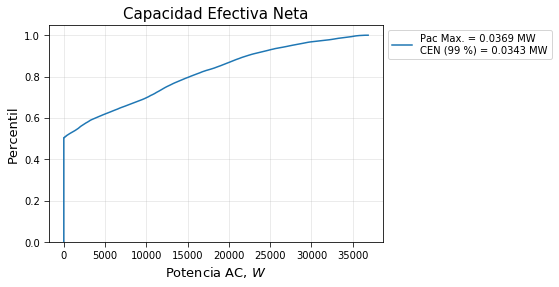

In [16]:
route()
import cno_cen

perc = 99

cen_per, cen_pmax = cno_cen.get_cen(ac=ac, 
                                    perc=perc,
                                    decimals=4,
                                    curve=True)

## 8. ENFICC

In [17]:
route()
import cno_energia_firme

# Prepare Data
df_hora = df[['GHI', 'Temperature']]
df_hora['GHI'] = df_hora['GHI'] / 1000
df_hora = df_hora.loc[df_hora.GHI != 0]

ghi = df_hora.resample('M').apply(lambda x: x.quantile(0.95)).GHI # https://stackoverflow.com/questions/39246664/calculate-percentiles-quantiles-for-a-timeseries-with-resample-or-groupby-pand
ghi_agg = df_hora['GHI'].resample('M').sum() # Falta de W/m2 a kW/m2
temp = df_hora['Temperature'].resample('M').mean()

df_mes = pd.DataFrame({'GHI': ghi, 'Insolation': ghi_agg,'Temperature': temp})

# ENFICC CREG 201 de 2017
efirme, enficc_t = cno_energia_firme.enficc_creg(df=df_mes, 
                                                 Kinc=0.9688, 
                                                 IHF=0.1, 
                                                 CEN=cen_per, # 0.05
                                                 a=3.8e-05, 
                                                 b=-0.0024, 
                                                 c=0.05224, 
                                                 d=-0.3121, 
                                                 Kmedt=0.8540)

# Energía Firme PVlib + CREG
__, enficc_v2 = cno_energia_firme.efirme_pvlib_creg(energy=energy)

# Energía Firme: PVlib + Min
enficc_v3 = cno_energia_firme.efirme_pvlib_min(energy=energy)

# Energía Firme: PVlib + Percentil
enficc_v4 = cno_energia_firme.efirme_pvlib_percentile(energy=energy,
                                                      percentile=95)

ENFICC [kWh/día] -- CREG 201 de 2017 = 70.3
ENFI [kWh/día] -- Mín(Energía Mes PVlib / Días) = 111.89
ENFI [kWh/día] -- Mín(Energía Día PVlib) = 27.03
ENFI [kWh/día] -- Percentil(Energía Día PVlib) = 250.51


In [18]:
route()
import cno_energia_firme

# Prepare Data
df_hora = df[['GHI', 'Temperature']]
df_hora['GHI'] = df_hora['GHI'] / 1000
df_hora = df_hora.loc[df_hora.GHI != 0]

ghi = df_hora.resample('M').apply(lambda x: x.quantile(0.95)).GHI # https://stackoverflow.com/questions/39246664/calculate-percentiles-quantiles-for-a-timeseries-with-resample-or-groupby-pand
ghi_agg = df_hora['GHI'].resample('M').sum() # Falta de W/m2 a kW/m2
temp = df_hora['Temperature'].resample('M').mean()

df_mes = pd.DataFrame({'GHI': ghi, 'Insolation': ghi_agg,'Temperature': temp})

# ENFICC CREG 201 de 2017
efirme, enficc_t = cno_energia_firme.enficc_creg(df=df_mes, 
                                                 Kinc=0.9688, 
                                                 IHF=0.1, 
                                                 CEN=0.05, 
                                                 a=3.8e-05, 
                                                 b=-0.0024, 
                                                 c=0.05224, 
                                                 d=-0.3121, 
                                                 Kmedt=0.8540)

# Energía Firme PVlib + CREG
__, enficc_v2 = cno_energia_firme.efirme_pvlib_creg(energy=energy)

# Energía Firme: PVlib + Min
enficc_v3 = cno_energia_firme.efirme_pvlib_min(energy=energy)

# Energía Firme: PVlib + Percentil
enficc_v4 = cno_energia_firme.efirme_pvlib_percentile(energy=energy,
                                                      percentile=95)

ENFICC [kWh/día] -- CREG 201 de 2017 = 102.48
ENFI [kWh/día] -- Mín(Energía Mes PVlib / Días) = 111.89
ENFI [kWh/día] -- Mín(Energía Día PVlib) = 27.03
ENFI [kWh/día] -- Percentil(Energía Día PVlib) = 250.51


In [19]:
df_mes.head()

,GHI,Insolation,Temperature
2000-01-31 00:00:00-05:00,0.99200,151.663,13.005376
2000-02-29 00:00:00-05:00,0.98275,139.514,13.565476
2000-03-31 00:00:00-05:00,0.99700,157.480,13.575269
2000-04-30 00:00:00-05:00,0.87415,143.570,13.780556
2000-05-31 00:00:00-05:00,0.95170,156.327,13.411290


In [20]:
resolution = '5Min' #['5Min', 'Hourly']
file_name = f'/Users/nelsonsasa07/Documents/PV Simulations/Meteocontrol/SD_{resolution}.xlsx'

#Meteocontrol Irradiance Measurement
meteocontrolDB = pd.read_excel(io=file_name, sheet_name='Radiacion')
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_DC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_AC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Temperatura'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Energia'), on=['Date'])

#Clean Unnamed columns, taken from https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
cols = [c for c in meteocontrolDB.columns if c[:7] != "Unnamed"]
meteocontrolDB = meteocontrolDB[cols]

#Filter from August 3rd onwards when the system was fullo operational
meteocontrolDB = meteocontrolDB[meteocontrolDB["Date"] >= "2019-08-03T00:00:00"]
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

KeyboardInterrupt: 

In [ ]:
#Change Column Names for ease of use.
if resolution == '5Min':
    res = 5
    data_columns_name = ['Datetime', 'ghi', 'effective_irrad', 'dc_B', 'dc_A', 'dc_B_str1', 'dc_B_str2', 
                         'ac_B', 'ac_A', 'module_temp', 'air_temp', 'energy_B', 'energy_A']

else:
    res = 60
    data_columns_name = ['Datetime', 'ghi', 'effective_irrad', 'dc_B', 'dc_A', 
                         'ac_B', 'ac_A', 'module_temp', 'energy_B', 'energy_A']

meteocontrolDB.columns = data_columns_name
meteocontrolDB = meteocontrolDB.set_index('Datetime')
meteocontrolDB = meteocontrolDB.tz_localize(tz) #Set UTC-5:00
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

In [ ]:
meteocontrolDB['dc_A'].describe()

In [ ]:
np.percentile(meteocontrolDB['dc_A'], 99)

In [ ]:
day_energy = meteocontrolDB.energy_A.resample('1d').max()

In [ ]:
day_energy.describe()

In [ ]:
hor, ver = 13, 5
plt.figure(figsize=(hor,ver))

# df_to_plot = day_energy.loc[(day_energy.index.year == 2020) & (day_energy.index.month == 5)]

df_to_plot = day_energy.loc[(day_energy.index.year == 2020)]

plt.bar(df_to_plot.index, df_to_plot, label=f'Máx = {np.round(df_to_plot.max(), 2)} kWh')
plt.ylabel('Energía Diaria, kWh')
plt.xlabel('Día')
plt.legend(loc='best');


In [ ]:
month_energy = pd.DataFrame(day_energy.resample('1m').sum())
month_energy.describe()

In [ ]:
yy = 2020

hor, ver = 10, 4
plt.figure(figsize=(hor,ver))

# MEDICIÓN
plt.subplot(1, 2, 1)

df_to_plot = month_energy.loc[(month_energy.index.year == yy)]

plt.bar(df_to_plot.index.month, df_to_plot['energy_A'], label=f'Máx = {np.round(df_to_plot.energy_A.max(), 2)} kWh')
plt.ylabel('Energía Mensual, kWh')
plt.xlabel(f'Mes ({yy})')
plt.title('Meteocontrol')
plt.ylim(0, 7000)
plt.legend(loc='best');

# SIMULACIÓN
plt.subplot(1, 2, 2)

df_to_plot = energy['month'].loc[(energy['month'].index.year == yy)]

plt.bar(df_to_plot.index.month, df_to_plot['energy']/1000, label=f'Máx = {np.round(df_to_plot.energy.max()/1000, 2)} kWh')
#plt.ylabel('Energía Mensual, kWh')
plt.xlabel(f'Mes ({yy})')
plt.title('Simulación TMY')
plt.ylim(0, 7000)
plt.legend(loc='best');

In [ ]:
#Energy Error Comparison Plot
#bar_width = 0.25
#width = bar_width*2

months = ['Jan\n2019', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan\n2020', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dec']

x = np.arange(len(months))

#Bar Plots
route()
import cno_plots_metrics

hor, ver = 13, 5
plt.figure(figsize=(hor,ver))

plt.bar(x, energy['month']['energy'].tail(12*2), color='#1580E4',
        label=f'ENFICC CREG 201 = {enficc_t} kWh/día\
                \n\nEF PVlib-CREG = {enficc_v2} kWh/día\
                \n\nEF PVlib-Min = {enficc_v3} kWh/día\
                \n\nEF PVlib-Perc ({perc} %) = {enficc_v4} kWh/día')

plt.xticks(x, months);

cno_plots_metrics.plot_specs(title='Energía Mensual',
                             ylabel=f'Energía, ${energy_units}$',
                             xlabel='Tiempo',
                             rot=0, 
                             ylim_min=0, ylim_max=None, 
                             xlim_min=None, xlim_max=None, 
                             loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9.5);

In [ ]:
may_2020 = energy['daily'].loc[(energy['daily'].index.year == 2020) & (energy['daily'].index.month == 5)]

hor, ver = 13, 5
plt.figure(figsize=(hor,ver))

plt.bar(may_2020.index, may_2020['energy'], color='#1580E4')

cno_plots_metrics.plot_specs(title='Energía Mensual',
                             ylabel=f'Energía, ${energy_units}$',
                             xlabel='Tiempo',
                             rot=0, 
                             ylim_min=0, ylim_max=None, 
                             xlim_min=None, xlim_max=None, 
                             loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9.5);

## 9. Relación Recurso-Potencia

In [ ]:
route()
import cno_recurso_potencia

cno_recurso_potencia.get_curve(poa=poa.poa_global, 
                               ac=ac, 
                               ac_units='kW')